==========================================
Bike Sharing Dataset
==========================================
=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on hourly basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	
=========================================
Dataset characteristics
=========================================	
 hour.csv has the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
pd.set_option("display.max_columns",None)
data=pd.read_csv("hour.csv")

In [57]:
data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [58]:
data.shape

(17379, 17)

### As seen below, the categorical features has already been encoded and thus has an integer datatype. This will be corrected back to category datatype in upcoming cells


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Dropping the instant column because it doesn't have any inference on the data. Dropping the dteday and year because the months and hour has already been extracted from it.

In [60]:
data=data.drop(columns=["instant","dteday"])

In [61]:
data.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


### Renaming the columns for easy readability and identification

In [62]:
data=data.rename(columns={"mnth":"month","hr":"hour","yr":"year","weathersit":"weather","hum":"humidity","cnt":"count"})

In [63]:
data.head(2)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


### Checking for duplicates

In [5]:
data.duplicated().sum()

2

### Dropping duplicates

In [64]:
data=data.drop_duplicates()

In [65]:
data.duplicated().sum()

0

In [66]:
data.shape

(17377, 15)

### Checking for Null values

In [67]:
data.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   year        17377 non-null  int64  
 2   month       17377 non-null  int64  
 3   hour        17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weather     17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  humidity    17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  casual      17377 non-null  int64  
 13  registered  17377 non-null  int64  
 14  count       17377 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.1 MB


### Changing the datatype of season,month,hour,holiday,weekday,working day,weather to category

In [69]:
columns=["season","month","hour","year","holiday","weekday","workingday","weather"]
for col in columns:
    data[col]=data[col].astype("category")

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17377 non-null  category
 1   year        17377 non-null  category
 2   month       17377 non-null  category
 3   hour        17377 non-null  category
 4   holiday     17377 non-null  category
 5   weekday     17377 non-null  category
 6   workingday  17377 non-null  category
 7   weather     17377 non-null  category
 8   temp        17377 non-null  float64 
 9   atemp       17377 non-null  float64 
 10  humidity    17377 non-null  float64 
 11  windspeed   17377 non-null  float64 
 12  casual      17377 non-null  int64   
 13  registered  17377 non-null  int64   
 14  count       17377 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.2 MB


# Exploratory Analysis

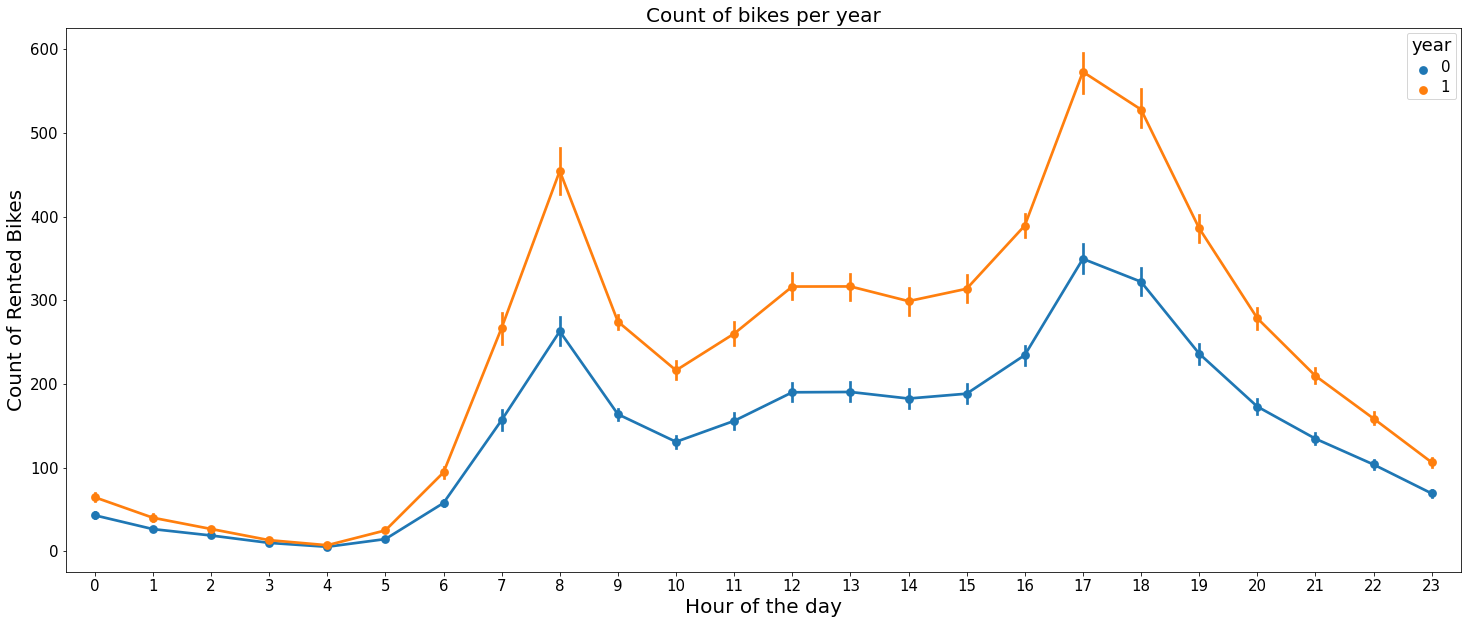

In [29]:
fig,ax=plt.subplots(figsize=(25,10))
sns.pointplot(x="hour",y="count",hue="year",data=data)
ax.set_title("Count of bikes per year",fontsize=20)
ax.set_xlabel("Hour of the day",fontsize=20)
ax.set_ylabel("Count of Rented Bikes",fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

As can be observed above, the hours in which bike was rented in 2011 and 2012 are the same. This means that those hours have been consistent over two years and are more likely to be consistent over coming years. It can also be observed that the number of people renting bikes has increased over the year and thus we can say that this business has grown in terms of customers.

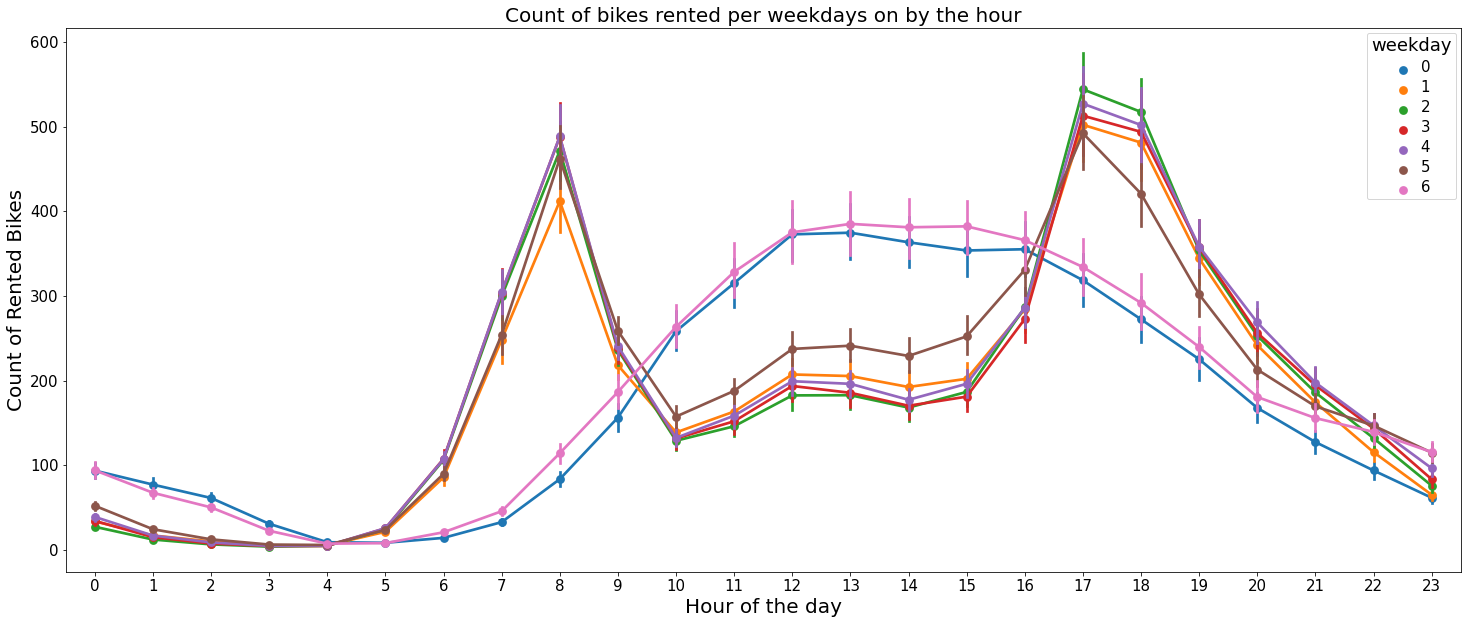

In [12]:
fig,ax=plt.subplots(figsize=(25,10))
sns.pointplot(x="hour",y="count",hue="weekday",data=data)
ax.set_title("Count of bikes rented per weekdays on by the hour",fontsize=20)
ax.set_xlabel("Hour of the day",fontsize=20)
ax.set_ylabel("Count of Rented Bikes",fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

1-5 stands for weekdays(mon-fri) while 0 and 6 stands for weekends( sunday and saturday) The above chart shows that on weekdays, the count of rented bikes are very minimal at midnights(12-4am) and there is an increase from 5am-8am(8am is the peak rentage hour) which makes sense because most people will be asleep by midnight and start preparing or leaving for work from 5-8am. It also shows a drop in rentage till 4pm and there isn increase till 6pm(due to people dropping off the rented bikes).

On weekends, there are about 100 people renting bikes at midnight(probably due to parties or clubbing). But unlike weekdays, the exponential increase in rentage starts 8am and there is a staeady increase till 4pm before the count decreses

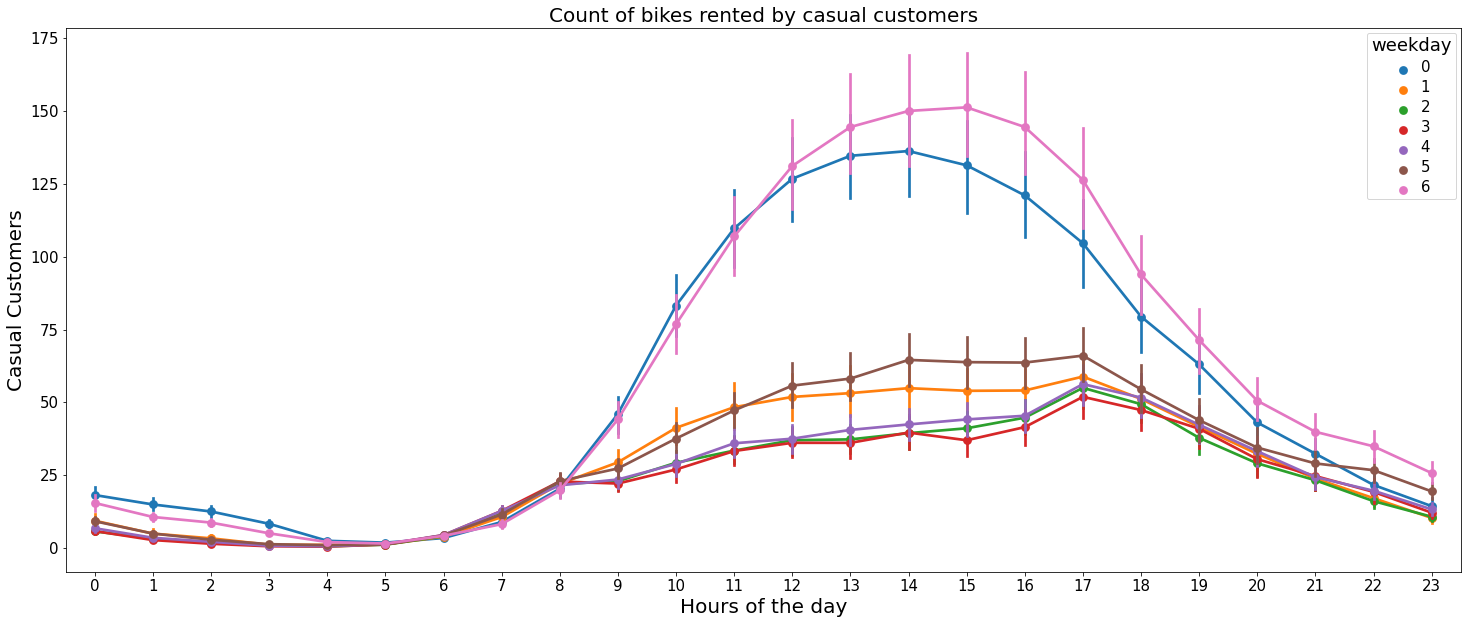

In [15]:
fig,ax=plt.subplots(figsize=(25,10))
sns.pointplot(x="hour",y="casual",hue="weekday",data=data)
ax.set_title("Count of bikes rented by casual customers",fontsize=20)
ax.set_xlabel("Hours of the day",fontsize=20)
ax.set_ylabel("Casual Customers",fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


From the above chart, we can see that the amount of casual customers(Not registered as a Renter) who rented bikes on weekends were significantly higher than those of weekdays. It is also observed that the increase in the rentage starts from 8am.

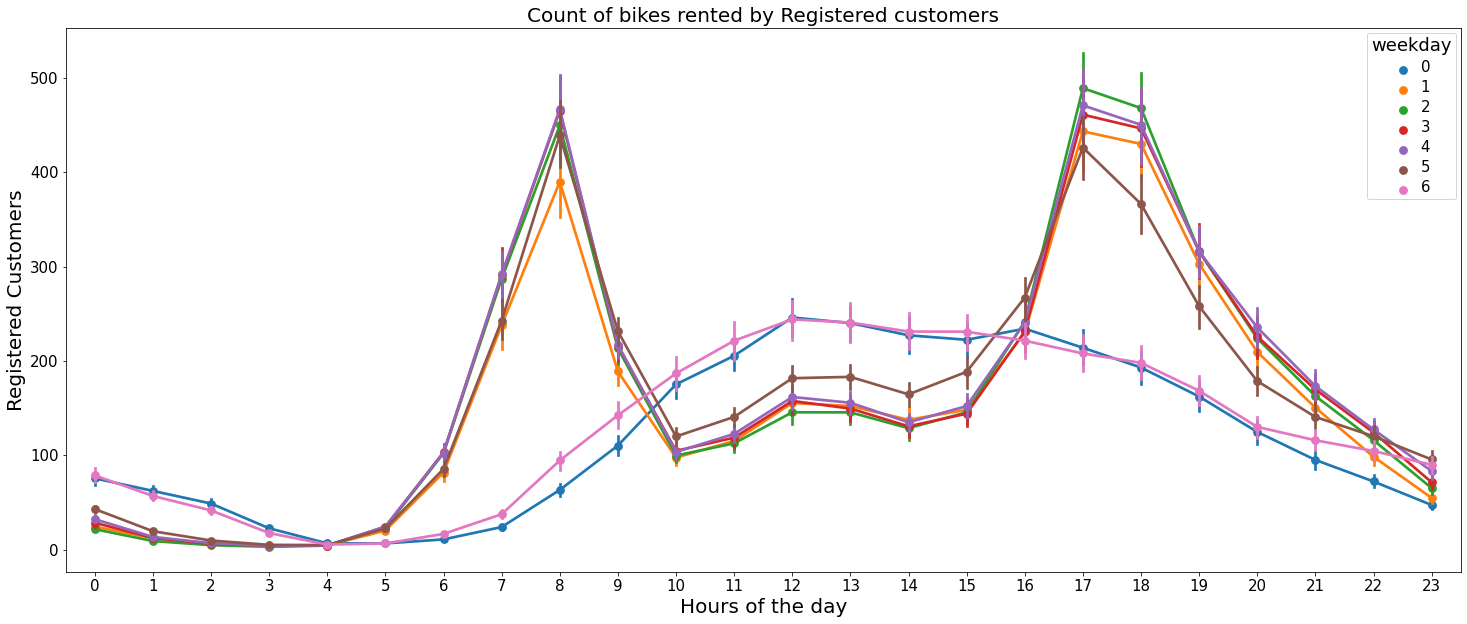

In [16]:
fig,ax=plt.subplots(figsize=(25,10))
sns.pointplot(x="hour",y="registered",hue="weekday",data=data)
ax.set_title("Count of bikes rented by Registered customers",fontsize=20)
ax.set_xlabel("Hours of the day",fontsize=20)
ax.set_ylabel("Registered Customers",fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

From the chart above, Most registered users rents bikes on weekdays.

Text(0, 0.5, 'Count of Rented Bikes')

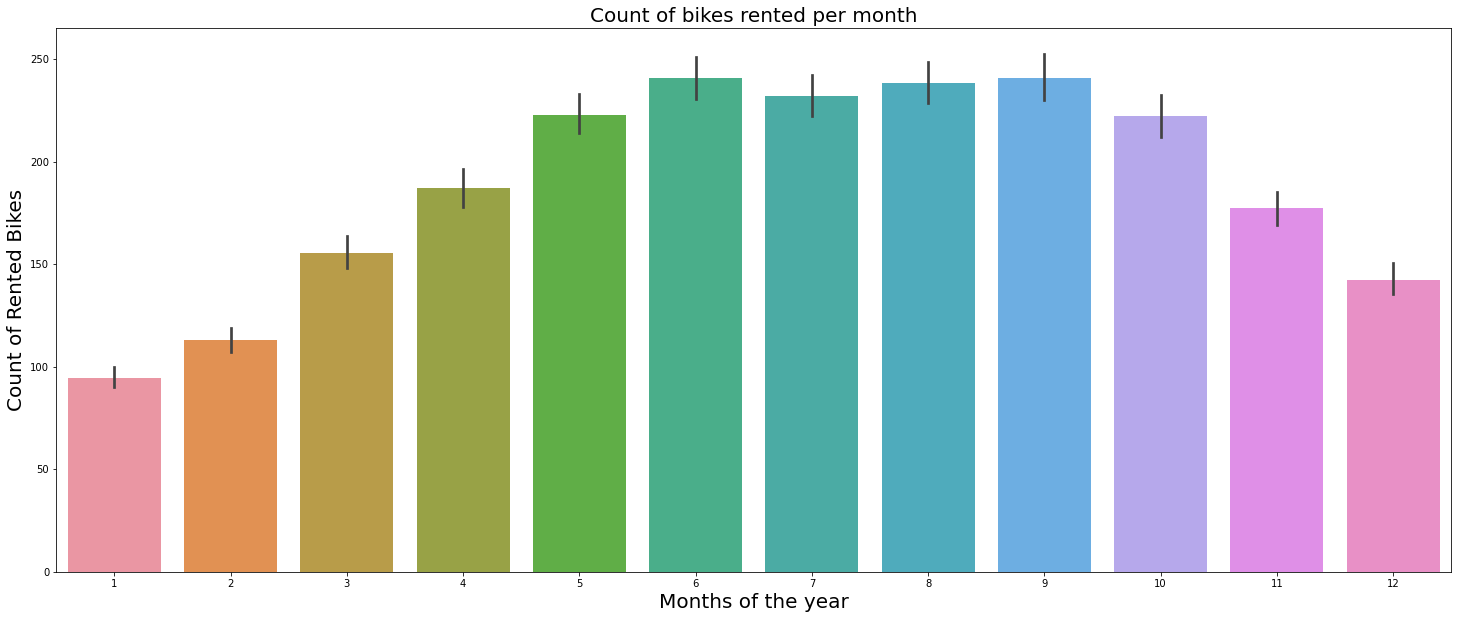

In [9]:
fig,ax=plt.subplots(figsize=(25,10))
sns.barplot(x="month",y="count",data=data)
ax.set_title("Count of bikes rented per month",fontsize=20)
ax.set_xlabel("Months of the year",fontsize=20)
ax.set_ylabel("Count of Rented Bikes",fontsize=20)


Text(0, 0.5, 'Count of Rented Bikes')

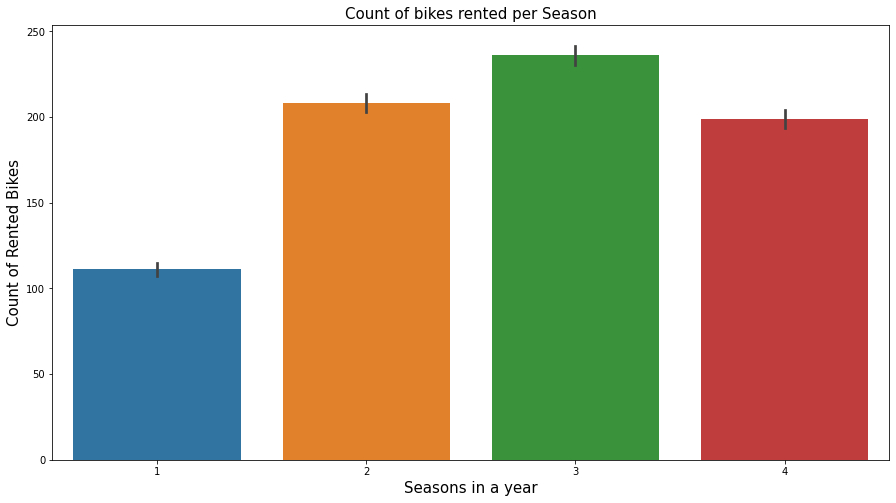

In [41]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="season",y="count",data=data)
ax.set_title("Count of bikes rented per Season",fontsize=15)
ax.set_xlabel("Seasons in a year",fontsize=15)
ax.set_ylabel("Count of Rented Bikes",fontsize=15)


Spring has the lowest rentage rate and this is due to increased rainfall which would deter customers from renting a bike. Fall and summer has the highest rental rate while winter has a slightly lower rate

Text(0, 0.5, 'Count of Rented Bikes')

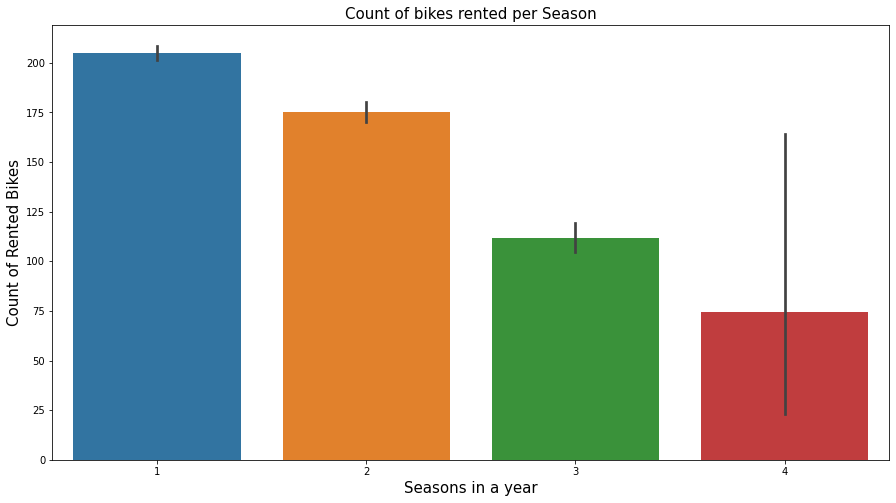

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="weather",y="count",data=data)
ax.set_title("Count of bikes rented per Season",fontsize=15)
ax.set_xlabel("Seasons in a year",fontsize=15)
ax.set_ylabel("Count of Rented Bikes",fontsize=15)


Higher rentage when the sky is clear or partly cloudy and lowest patronage when there is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Text(0, 0.5, 'Count of Rented Bikes')

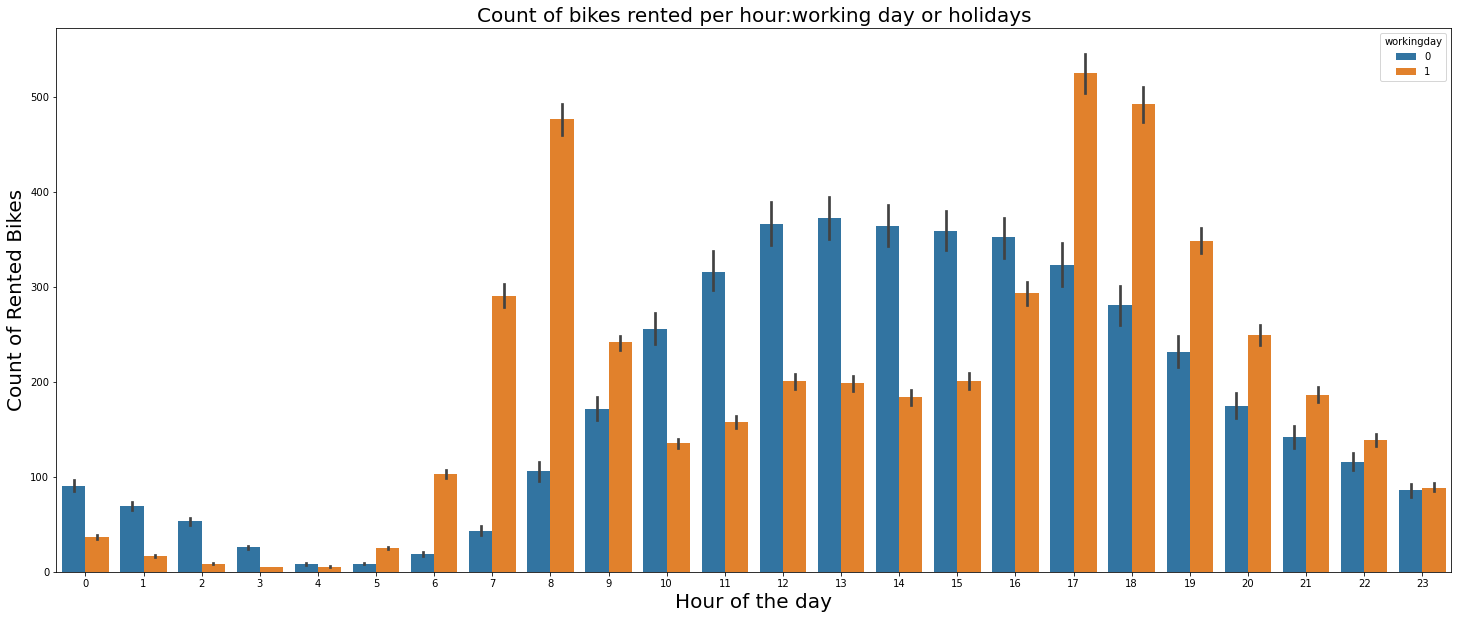

In [21]:
fig,ax=plt.subplots(figsize=(25,10))
sns.barplot(x="hour",y="count",hue="workingday",data=data)
ax.set_title("Count of bikes rented per hour:working day or holidays",fontsize=20)
ax.set_xlabel("Hour of the day",fontsize=20)
ax.set_ylabel("Count of Rented Bikes",fontsize=20)


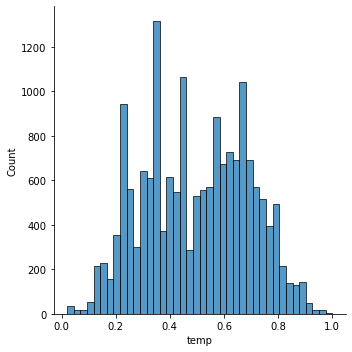

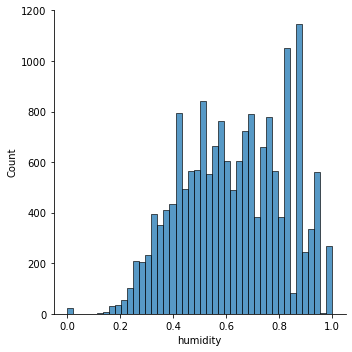

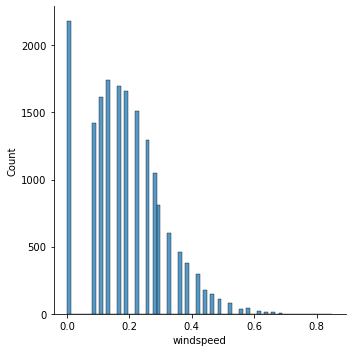

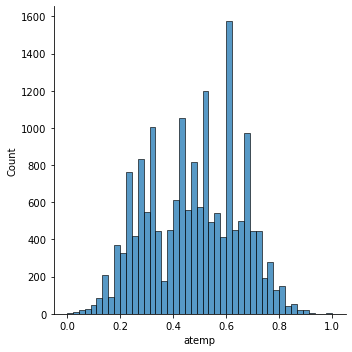

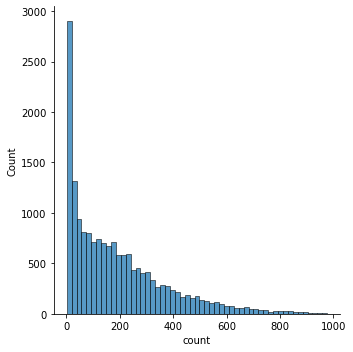

In [45]:
col=["temp","humidity","windspeed","atemp","count"]
for i in col:
    sns.displot(data[i])

In [50]:
data[["temp","humidity","atemp","windspeed"]].corr()

,temp,humidity,atemp,windspeed
temp,1.000000,-0.069931,0.987671,-0.023141
humidity,-0.069931,1.000000,-0.051960,-0.290070
atemp,0.987671,-0.051960,1.000000,-0.062357
windspeed,-0.023141,-0.290070,-0.062357,1.000000


In [52]:
data=data.drop(columns="atemp")

In [54]:
data[["temp","humidity","windspeed","count"]].corr()

,temp,humidity,windspeed,count
temp,1.000000,-0.069931,-0.023141,0.404798
humidity,-0.069931,1.000000,-0.290070,-0.322872
windspeed,-0.023141,-0.290070,1.000000,0.093155
count,0.404798,-0.322872,0.093155,1.000000


Temperature has the highest correlation to the count of people. As temperature increase. the count of rentals increases. 